In [1]:
# Import our dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from tensorflow import keras
from tensorflow.keras import layers
import math
import numpy as np

df = pd.read_csv("C:/Users/laura/Documents/Bootcamp/Final_Project/Resources/IDXX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-12,157.529999,163.089996,157.529999,161.759995,161.759995,485000
1,2017-10-13,161.259995,162.639999,159.190002,159.600006,159.600006,374200
2,2017-10-16,159.970001,160.429993,158.240005,158.550003,158.550003,368600
3,2017-10-17,158.089996,160.070007,158.089996,160.000000,160.000000,272200
4,2017-10-18,159.830002,163.270004,159.279999,163.050003,163.050003,454900


In [2]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns = {'Adj Close':'Adj_Close'}, inplace=True)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-10-12 to 2022-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj_Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


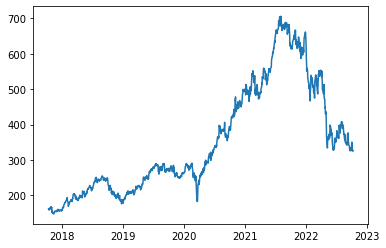

In [4]:
plt.plot(df.Adj_Close)

In [5]:
df.to_csv('IDXX_clean.csv', index=False)

In [6]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2017-10-12,157.529999,163.089996,157.529999,161.759995,161.759995,485000
2017-10-13,161.259995,162.639999,159.190002,159.600006,159.600006,374200
2017-10-16,159.970001,160.429993,158.240005,158.550003,158.550003,368600
2017-10-17,158.089996,160.070007,158.089996,160.000000,160.000000,272200
2017-10-18,159.830002,163.270004,159.279999,163.050003,163.050003,454900


In [7]:
# separate target and features

y = df['Adj_Close']
X = df.drop(columns=['Adj_Close'])

In [8]:
close_prices = df['Adj_Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
x_train

array([[[0.02522936],
        [0.02135897],
        [0.01947751],
        ...,
        [0.02917147],
        [0.03390197],
        [0.03117834]],

       [[0.02135897],
        [0.01947751],
        [0.0220757 ],
        ...,
        [0.03390197],
        [0.03117834],
        [0.03234304]],

       [[0.01947751],
        [0.0220757 ],
        [0.02754087],
        ...,
        [0.03117834],
        [0.03234304],
        [0.0330777 ]],

       ...,

       [[0.91338155],
        [0.93190941],
        [0.93484808],
        ...,
        [0.83701258],
        [0.84125927],
        [0.85172377]],

       [[0.93190941],
        [0.93484808],
        [0.93483014],
        ...,
        [0.84125927],
        [0.85172377],
        [0.84099056]],

       [[0.93484808],
        [0.93483014],
        [0.93683701],
        ...,
        [0.85172377],
        [0.84099056],
        [0.83337517]]])

In [9]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
947/947 [==============================] - 14s 13ms/step - loss: 0.0028
Epoch 2/3
947/947 [==============================] - 12s 12ms/step - loss: 0.0011
Epoch 3/3
947/947 [==============================] - 12s 12ms/step - loss: 0.0013


In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 236421.6562 - 886ms/epoch - 111ms/step


TypeError: cannot unpack non-iterable float object

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8/8 [==============================] - 1s 16ms/step


5.779905242475403

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


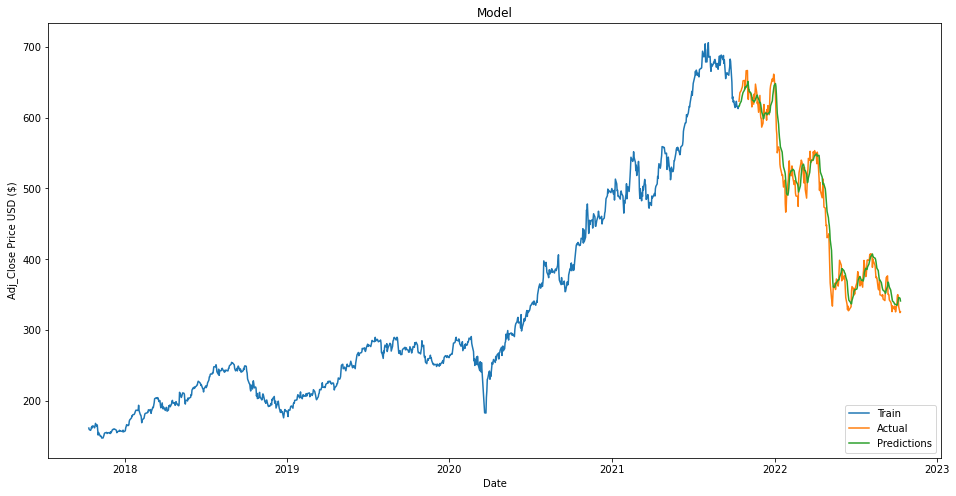

In [15]:
data = df.filter(['Adj_Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Adj_Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj_Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

source: https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [16]:
validation

,Adj_Close,Predictions
Date,,
2021-10-13,623.119995,616.050659
2021-10-14,629.719971,617.006470
2021-10-15,635.150024,619.581055
2021-10-18,638.289978,623.121216
2021-10-19,640.989990,626.747070
...,...,...
2022-10-05,350.119995,339.482452
2022-10-06,346.019989,343.652496
2022-10-07,333.239990,346.232513


In [17]:
data

,Adj_Close
Date,
2017-10-12,161.759995
2017-10-13,159.600006
2017-10-16,158.550003
2017-10-17,160.000000
2017-10-18,163.050003
...,...
2022-10-05,350.119995
2022-10-06,346.019989
2022-10-07,333.239990
